# Study of [EPIC249470337](https://exofop.ipac.caltech.edu/k2/edit_target.php?id=249470337)

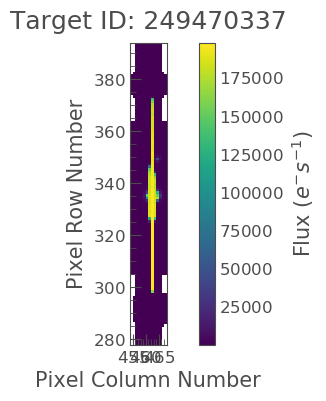

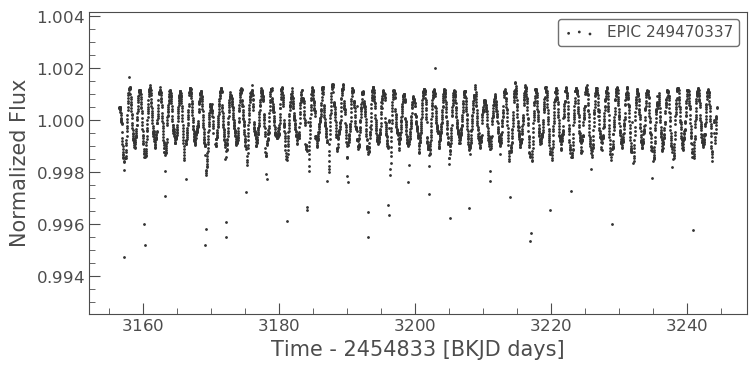

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import search_lightcurvefile
from lightkurve import search_targetpixelfile
target = '249470337'

tpf = search_targetpixelfile(target).download()
tpf.plot()
lc = search_lightcurvefile(target).download().PDCSAP_FLUX.remove_nans().remove_outliers().flatten()
lc.scatter()

Best Fit Period: 1.5000 days


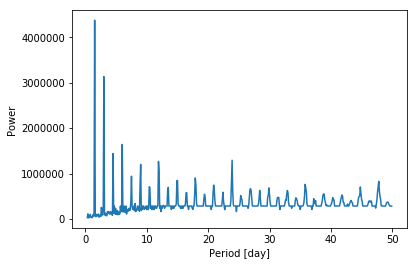

In [9]:
from astropy.stats import BoxLeastSquares
import matplotlib.pyplot as plt

bls = BoxLeastSquares(lc.time, lc.flux, lc.flux_err)
periods = np.arange(0.3, 50, 0.1)
durations = np.arange(0.005, 0.15, 0.001)
periodogram = bls.power(periods, durations)

plt.plot(periodogram.period, periodogram.power)
plt.ylabel("Power")
plt.xlabel("Period [day]");

period = periods[np.argmax(periodogram.power)]
print('Best Fit Period: {:0.4f} days'.format(period))

Best Fit Period: 1.4914 days


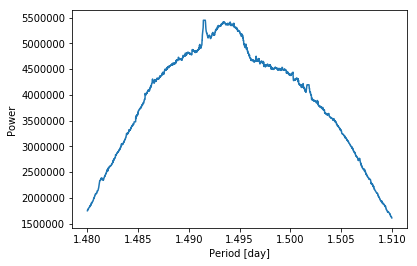

In [14]:
bls = BoxLeastSquares(lc.time, lc.flux, lc.flux_err)
periods = np.arange(1.48, 1.51, 0.00001)
durations = np.arange(0.005, 0.15, 0.001)
periodogram = bls.power(periods, durations)

plt.plot(periodogram.period, periodogram.power)
plt.ylabel("Power")
plt.xlabel("Period [day]");

period = periods[np.argmax(periodogram.power)]
print('Best Fit Period: {:0.4f} days'.format(period))

2.98288000000015

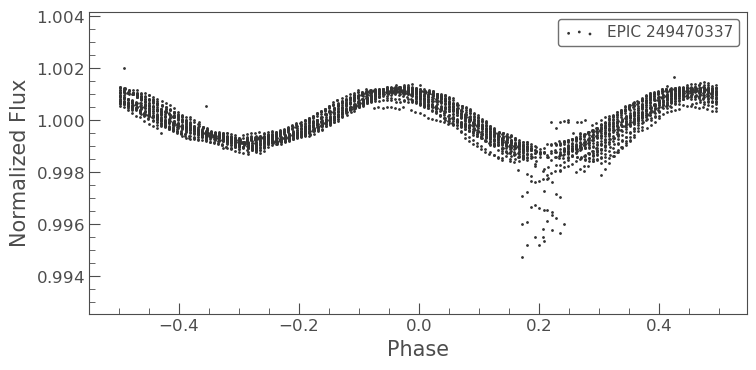

In [31]:
period_f = period *2 
lcf = lc.fold(period=period_f,t0=0.8)
lcf.scatter()
lcf.time_format = 'jd'
period_f

**Binary system or star oscillation?**